# Graphs
This notebook creates the graphs for the concepts paper

Firstly, load in the required packages (if you use the dockerfile in .devcontainer everything should be there)

In [1]:
library(tidyverse)
library(hrbrthemes)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



Then we can define the function and vectorize it

In [2]:
f <- function(context, agent_pressure) {
    if (agent_pressure > 0) {
        return((1 + context) / 2 * agent_pressure)
    } else {
        return((1 - context) / 2 * agent_pressure)
    }
}
vf <- Vectorize(f, vectorize.args = "agent_pressure")

Now apply this to three potential scenarios and create the tibble

In [3]:
x <- seq(-1, 1,  by = 0.01)
y0 <- vf(1, x)
y1 <- vf(0, x)
y2 <- vf(-0.75, x)
df <- tibble(
    x = x,
    y0 = y0,
    y1 = y1,
    y2 = y2
) %>% pivot_longer(-x)
df$name <- ifelse(
    df$name == "y0",
    "Context=1",
    ifelse(
        df$name == "y1",
        "Context=0",
        "Context=-0.75"
    )
)
head(df)

x,name,value
<dbl>,<chr>,<dbl>
-1.00,Context=1,0.00000
-1.00,Context=0,-0.50000
-1.00,Context=-0.75,-0.87500
-0.99,Context=1,0.00000
-0.99,Context=0,-0.49500
-0.99,Context=-0.75,-0.86625


Finally create the graph and export the figure!

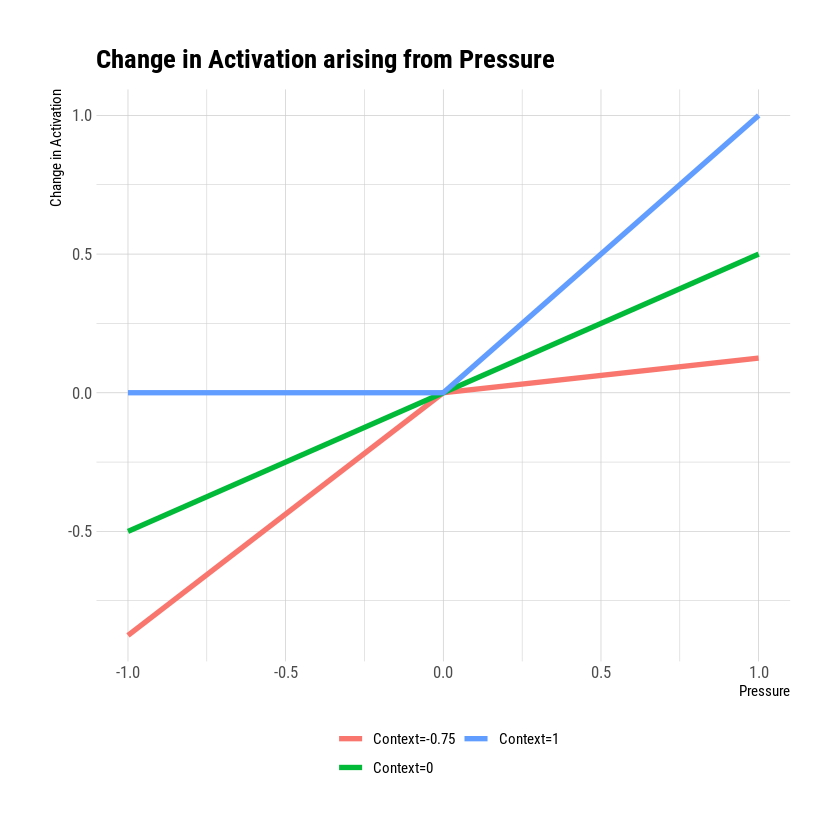

In [5]:
ggplot(df, aes(x = x, y = value, colour = name)) +
    geom_line(size = 1.5) +
    labs(
        x = "Pressure",
        y = "Change in Activation",
        colour = "",
        title = "Change in Activation arising from Pressure"
    ) +
    guides(colour = guide_legend(ncol = 2)) +
    theme_ipsum_rc(base_size = 10) +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 9),
        plot.title = element_text(size = 16))
ggsave("contextualagentpressure.pdf", device = cairo_pdf, width = 6, height = 6, units = "in")